In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statistics import mean
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, RepeatVector
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from hyperopt import hp, Trials, fmin, tpe
import joblib
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r'E:\A aPython Programms\Data1\Bank.csv')
df.tail(5)

,Date,AXISBANK,AXISVOL,BAJAJFIN,BAJAJFINVOL,BOB,BOBVOL,FEDBANK,FEDVOL,HDFC,...,KOTAK,KOTAKVOL,PNB,PNBVOL,SBI,SBIVOL,REC,RECVOL,PIRAMAL,PIRAMALVOL
3748,21-03-2024,1035.599976,9903738,6715.750000,1806092,255.699997,10121220,149.949997,6212045,1445.750000,...,1772.150024,3783681,121.050003,38099730,744.299988,15161161,450.250000,18429233,841.599976,987716
3749,22-03-2024,1033.300049,9891194,6760.899902,1125238,259.799988,11402546,149.600006,8409218,1442.849976,...,1776.400024,7061283,122.750000,35001868,746.700012,15535921,460.100006,12531582,861.500000,1618543
3750,26-03-2024,1040.550049,9656767,6910.100098,1850321,261.549988,8259347,149.800003,7742995,1425.400024,...,1753.699951,5303630,123.949997,30860596,740.049988,14678342,461.399994,10475524,858.250000,1391794
3751,27-03-2024,1052.849976,17027308,7022.750000,1551275,258.750000,19196992,149.800003,20853016,1440.699951,...,1775.599976,8231130,122.750000,42673023,733.299988,30088789,445.600006,28138339,840.200012,1344329
3752,28-03-2024,1047.199951,10235318,7245.250000,3574518,264.049988,11966752,150.199997,7208707,1447.900024,...,1785.500000,6630072,124.400002,29453142,752.349976,21705116,451.000000,12637899,849.349976,5261416


In [3]:
feature_columns = [ 'SBI', 'SBIVOL', 'BAJAJFIN', 'FEDBANK', 'ICICI']
target_column = ['SBI']
features = df[feature_columns]
target = df[target_column].shift(-1)

new_data1 = 758.30
target.iloc[-1, 0] = new_data1

target.tail(5)

,SBI
3748,746.700012
3749,740.049988
3750,733.299988
3751,752.349976
3752,758.300000


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

n_steps = 5  # Number of timesteps to look back
X, y = [], []

for i in range(n_steps, len(scaled_features)):
    X.append(scaled_features[i-n_steps:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

split=int(0.8*len(X))
X_train, y_train= X[:split], y[:split]
X_test, y_test= X[split:], y[split:]

In [5]:
model_lstm = load_model('model_lstm_sbi1h_0.9813.keras')
model_lstm.predict(X_test)

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_test, predictions_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R2: 0.9813
MAPE: 0.0174
RMSE: 11.8628
RMSE_normalizeddata: 0.0170
MAE_normalizeddata: 0.0130
MAE: 9.0545


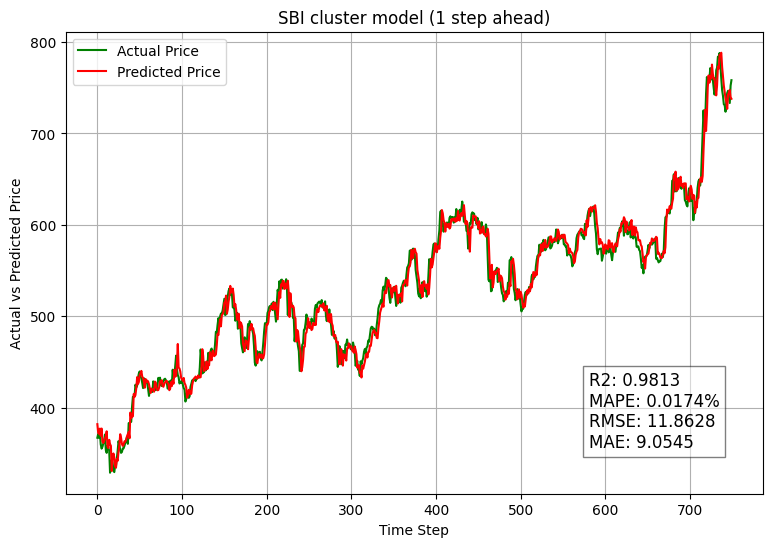

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(y_test_actual_LSTM, color='green', label=['Actual Price'])
plt.plot(predictions_LSTM, color='red', label=['Predicted Price'])
plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')

plt.text(0.75, 0.1, f'R2: {r2:.4f}\nMAPE: {mape:.4f}%\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.title('SBI cluster model (1 step ahead)')
plt.xlabel('Time Step')
plt.ylabel('Actual vs Predicted Price')
plt.savefig('sbicluster_1sa.png', dpi=600)  # Saves the plot as a PNG file
plt.show()

In [110]:
model_lstm.predict(X_train)

predictions_train_lstm = model_lstm.predict(X_train)
predictions_train_LSTM = scaler.inverse_transform(predictions_train_lstm)
y_train_actual_LSTM = scaler.inverse_transform(y_train.reshape(-1, 1))

r2=r2_score(y_train_actual_LSTM, predictions_train_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_train_actual_LSTM, predictions_train_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_train, predictions_train_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_train, predictions_train_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAE: {mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R2: 0.9790
MAPE: 0.0242
RMSE: 7.8628
RMSE_normalizeddata: 0.0113
MAE_normalizeddata: 0.0082
MAE: 5.7143


In [85]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0049 - val_loss: 9.3159e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6596e-04 - val_loss: 5.2126e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5099e-04 - val_loss: 5.8085e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5993e-04 - val_loss: 4.8321e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2965e-04 - val_loss: 0.0016
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3654e-04 - val_loss: 6.1669e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0375e-04 - val_loss: 4.6112e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8357e-04 - val_loss: 9.8857e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8779e-04 - val_loss: 4.2511e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7837e-04 - val_loss: 6.0476e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6678e-04 - val

In [86]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [87]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6849e-04 - val_loss: 4.9220e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4639e-04 - val_loss: 5.0579e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2618e-04 - val_loss: 5.3817e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4738e-04 - val_loss: 5.0583e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2734e-04 - val_loss: 5.1428e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2261e-04 - val_loss: 4.6997e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0171e-04 - val_loss: 7.8295e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7770e-04 - val_loss: 7.5174e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7861e-04 - val_loss: 9.5996e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8687e-04 - val

In [88]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [89]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])


predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0047 - val_loss: 9.3389e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8068e-04 - val_loss: 0.0036
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7727e-04 - val_loss: 8.5866e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5204e-04 - val_loss: 0.0025
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6071e-04 - val_loss: 6.4510e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1436e-04 - val_loss: 0.0011
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9397e-04 - val_loss: 4.7360e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8335e-04 - val_loss: 7.1378e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0519e-04 - val_loss: 6.7665e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7521e-04 - val_loss: 3.9478e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7251e-04 - val_loss: 

In [90]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [91]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0061 - val_loss: 0.0014
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8429e-04 - val_loss: 9.0304e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6318e-04 - val_loss: 5.3868e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8356e-04 - val_loss: 9.1454e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7651e-04 - val_loss: 4.4126e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6316e-04 - val_loss: 7.9065e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3992e-04 - val_loss: 4.3340e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1879e-04 - val_loss: 4.2554e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7495e-04 - val_loss: 4.5801e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7738e-04 - val_loss: 5.6359e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9075e-04 - val

In [92]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [93]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0054 - val_loss: 9.4870e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1982e-04 - val_loss: 6.3284e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6567e-04 - val_loss: 6.6254e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3027e-04 - val_loss: 6.2602e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2685e-04 - val_loss: 5.5198e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0207e-04 - val_loss: 4.6800e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1246e-04 - val_loss: 4.6706e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7170e-04 - val_loss: 5.5524e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1492e-04 - val_loss: 0.0017
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1985e-04 - val_loss: 0.0013
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6709e-04 - val_los

In [94]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [95]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])


predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3688e-04 - val_loss: 0.0059
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6201e-04 - val_loss: 0.0052
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4711e-04 - val_loss: 0.0019
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3304e-04 - val_loss: 6.1367e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9702e-04 - val_loss: 0.0018
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1148e-04 - val_loss: 5.9399e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8376e-04 - val_loss: 4.9121e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9092e-04 - val_loss: 8.8412e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6098e-04 - val_loss: 4.7612e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6906e-04 - val_loss: 5.1178e-0

In [96]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [97]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0043 - val_loss: 9.1236e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1370e-04 - val_loss: 0.0065
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0470e-04 - val_loss: 9.3048e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4481e-04 - val_loss: 6.8165e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2729e-04 - val_loss: 8.4385e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7475e-04 - val_loss: 4.5368e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3286e-04 - val_loss: 4.7431e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2378e-04 - val_loss: 3.8802e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0636e-04 - val_loss: 8.7539e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0201e-04 - val_loss: 3.2129e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5468e-04 - va

In [98]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [99]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4038e-04 - val_loss: 0.0012
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5358e-04 - val_loss: 8.3375e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4906e-04 - val_loss: 8.7466e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2034e-04 - val_loss: 9.5474e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0940e-04 - val_loss: 6.8414e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6189e-04 - val_loss: 5.0632e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8026e-04 - val_loss: 5.6043e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9336e-04 - val_loss: 3.9653e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8933e-04 - val_loss: 6.0671e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6853e-04 - val_los

In [100]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [101]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])


predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7243e-04 - val_loss: 7.5847e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9513e-04 - val_loss: 0.0014
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2719e-04 - val_loss: 5.0802e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1847e-04 - val_loss: 4.3868e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1388e-04 - val_loss: 5.9723e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3156e-04 - val_loss: 4.3188e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8447e-04 - val_loss: 9.9046e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0442e-04 - val_loss: 0.0015
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0580e-04 - val_loss: 5.6015e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7662e-04 - val_loss: 5

In [102]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")

In [103]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(205, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.008), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])


predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2164e-04 - val_loss: 7.1888e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4034e-04 - val_loss: 8.0304e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7681e-04 - val_loss: 0.0012
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0496e-04 - val_loss: 7.1723e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4090e-04 - val_loss: 0.0014
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0048e-04 - val_loss: 9.4468e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7897e-04 - val_loss: 4.4424e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0325e-04 - val_loss: 5.1116e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6468e-04 - val_loss: 3.4777e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6632e-04 - val_loss: 3

In [104]:
model_lstm.save(f"model_lstm1_sbi1h_{r2:.4f}.keras")